# Question_6: Plot how the average delay time evolves through the week

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import glob as glob
import datetime as date


In [81]:
all_files = glob.glob(r'C:\users\Annelien\Documents\SCHOOL\ACRM\Project NMBS\group7-group-assignment-\Data\Trips\*.csv')
all_files

['C:\\users\\Annelien\\Documents\\SCHOOL\\ACRM\\Project NMBS\\group7-group-assignment-\\Data\\Trips\\trips_20_9.csv_processed.csv',
 'C:\\users\\Annelien\\Documents\\SCHOOL\\ACRM\\Project NMBS\\group7-group-assignment-\\Data\\Trips\\trips_21_9.csv_processed.csv',
 'C:\\users\\Annelien\\Documents\\SCHOOL\\ACRM\\Project NMBS\\group7-group-assignment-\\Data\\Trips\\trips_22_9.csv_processed.csv',
 'C:\\users\\Annelien\\Documents\\SCHOOL\\ACRM\\Project NMBS\\group7-group-assignment-\\Data\\Trips\\trips_23_9.csv_processed.csv',
 'C:\\users\\Annelien\\Documents\\SCHOOL\\ACRM\\Project NMBS\\group7-group-assignment-\\Data\\Trips\\trips_24_9.csv_processed.csv',
 'C:\\users\\Annelien\\Documents\\SCHOOL\\ACRM\\Project NMBS\\group7-group-assignment-\\Data\\Trips\\trips_25_9.csv_processed.csv',
 'C:\\users\\Annelien\\Documents\\SCHOOL\\ACRM\\Project NMBS\\group7-group-assignment-\\Data\\Trips\\trips_26_9.csv_processed.csv']

In [82]:
df = pd.concat((pd.read_csv(f) for f in all_files))
df.head()

,Unnamed: 0,Date of departure,Train number,Relation,Railway operators,Railway of departure,Time of real arrival,Time of real departure,Time of planned arrival,Time of planned departure,Direction of relation,Name of the stop,Railway of arrival,Date of planned arrival,Date of planned departure,Date of real arrival,Date of real departure
0,0,2020-09-20,12408,EXTRA,SNCB/NMBS,19,09:50:07,09:50:31,09:50:00,09:50:00,NaN,LOMMEL,19,2020-09-20 00:00:00,2020-09-20,2020-09-20,2020-09-20
1,1,2020-09-20,12941,EXTRA,SNCB/NMBS,21A,18:16:52,18:16:52,18:12:00,18:12:00,NaN,KIEWIT,21A,2020-09-20 00:00:00,2020-09-20,2020-09-20,2020-09-20
2,2,2020-09-20,12410,EXTRA,SNCB/NMBS,19,11:56:31,11:56:58,11:57:00,11:57:00,NaN,OVERPELT,19,2020-09-20 00:00:00,2020-09-20,2020-09-20,2020-09-20
3,3,2020-09-20,12410,EXTRA,SNCB/NMBS,NaN,12:08:31,NaN,12:09:00,NaN,NaN,HAMONT,19,2020-09-20 00:00:00,NaN,2020-09-20,NaN
4,4,2020-09-20,12442,EXTRA,SNCB/NMBS,NaN,22:18:13,NaN,22:20:00,NaN,NaN,MOL,19,2020-09-20 00:00:00,NaN,2020-09-20,NaN


In [84]:
df = df[['Train number','Railway operators','Time of real arrival','Time of planned arrival','Date of planned arrival']]
   #filteren op kolommen dat je nodig hebt
df.columns

Index(['Train number', 'Railway operators', 'Time of real arrival',
       'Time of planned arrival', 'Date of planned arrival'],
      dtype='object')

In [85]:
df.dropna(subset = ['Time of planned arrival'], inplace = True) #lege values laten vallen, want je kan hier geen delay van berekenen

In [86]:
df.columns

Index(['Train number', 'Railway operators', 'Time of real arrival',
       'Time of planned arrival', 'Date of planned arrival'],
      dtype='object')

In [87]:
difference = df.sort_values(by=['Train number', 'Time of planned arrival'], ascending=True).groupby(
    'Train number').tail(
    1)  #je moet sorteren zowel volgens trein nummer & dan op tijd anders staan je routes niet bijeen (volgens wat gepland is! )
# groupby ( per route wil je de vertraging berekenen & tail: de laatste houd je over omdat dit je delay is tov je aankomst)

difference.head(5)

,Train number,Railway operators,Time of real arrival,Time of planned arrival,Date of planned arrival
768,10,SNCB/NMBS,21:33:24,21:35:00,2020-09-26 00:00:00
164,11,SNCB/NMBS,07:38:56,07:30:00,2020-09-26 00:00:00
36329,12,SNCB/NMBS,20:09:27,19:35:00,2020-09-25 00:00:00
4566,13,SNCB/NMBS,09:30:00,09:30:00,2020-09-26 00:00:00
6781,14,SNCB/NMBS,17:54:22,17:35:00,2020-09-26 00:00:00


In [88]:
difference['Time of real arrival'] = pd.to_datetime(difference['Time of real arrival'],format='%H:%M:%S')  #je format je real arrival into datetime
difference['Time of planned arrival'] = pd.to_datetime(difference['Time of planned arrival'],format='%H:%M:%S') #je format je planned arrival into datetime

difference['Delta'] = difference.apply(lambda x: (x['Time of real arrival'] - x['Time of planned arrival']).total_seconds(),
    axis=1)  #average delay time in seconds


difference['Delta'].head()

768       -96.0
164       536.0
36329    2067.0
4566        0.0
6781     1162.0
Name: Delta, dtype: float64

In [89]:
difference.loc[difference['Delta'] < 0, "Delta"]=0
difference['Delta'].head()

768         0.0
164       536.0
36329    2067.0
4566        0.0
6781     1162.0
Name: Delta, dtype: float64

In [91]:
difference['Date of planned arrival'] = pd.to_datetime(difference['Date of planned arrival'], format = '%Y-%m-%d')

difference['Date_of_week'] = difference['Date of planned arrival'].dt.day_name()

In [94]:
difference = difference[['Delta','Date of planned arrival','Date_of_week']]
difference = difference.groupby('Date_of_week')['Delta'].mean().reset_index(name='MeanPerDay')

difference['MeanPerDay'] = difference['MeanPerDay'].round(0)

In [95]:
def addvaluelabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


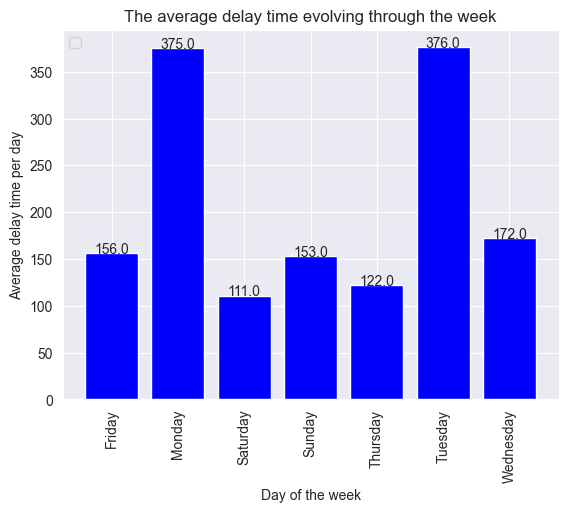

In [96]:
plt.bar(difference['Date_of_week'], difference['MeanPerDay'], color='blue')
addvaluelabels(difference['Date_of_week'], difference['MeanPerDay'])
plt.title('The average delay time evolving through the week')
plt.xlabel("Day of the week")
plt.ylabel("Average delay time per day")
plt.legend(loc="upper left")
plt.xticks(rotation= "vertical")
plt.show()
